In [1]:
Group Name - CS985MLDAGroup4
Maria Chiara Vernillo -qhb21198 
Ravina Suhagiya - 202187073
Viktoriia Khelemska - 202081049
Regression Score as on Kaggle - 9.75

In [ ]:
# fundamental libraries as always 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
import matplotlib.cm as cm
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import *
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from yellowbrick.target import FeatureCorrelation
from yellowbrick.base import ModelVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from sklearn.utils import check_X_y
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#We import the Train Dataset.

df = pd.read_csv(r"C:\Users\verni\Downloads\CS98XRegressionTrain.csv")
df_test = pd.read_csv(r"C:\Users\verni\Downloads\CS98XRegressionTest.csv")

In [3]:
df.head()

Id                                        title            artist  \
0   1                                 My Happiness    Connie Francis   
1   2                             Unchained Melody   The Teddy Bears   
2   3                        How Deep Is Your Love          Bee Gees   
3   4                                Woman in Love  Barbra Streisand   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   

         top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
1              NaN  2011  114    44    53  -8    13   47  139     49     3   
2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
4        glam rock  1973  121    47    56  -8    15   40  193     45     3   

   pop  
0   44  
1   37  
2   77  
3   67  
4   63

In [4]:
df.shape

(453, 15)

In [5]:
#We now check for missing or null values in the dataset
pd.isna(df).sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

### Looking for and treating outliers

In [6]:
#We visualise the variables:

ax = sns.boxplot(data=df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']], orient='h')

We look into the duration variable. 

In [7]:
#Now we look for outliers using the interquartile range. 

Q1 = np.percentile(df['dur'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['dur'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

IQR

81.0

In [8]:
#We now look at the upper and lower bounds, and treat the outliers
#by dropping them as they could skew our results later in the analysis. 

upper = np.where(df['dur'] >= (Q3 + 1.5*IQR))
lower = np.where(df['dur'] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.shape

(441, 15)

In [9]:
Q1 = np.percentile(df['bpm'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['bpm'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['bpm'] >= (Q3 + 1.5*IQR))
lower = np.where(df['bpm'] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.shape

(438, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         438 non-null    int64 
 1   title      438 non-null    object
 2   artist     438 non-null    object
 3   top genre  423 non-null    object
 4   year       438 non-null    int64 
 5   bpm        438 non-null    int64 
 6   nrgy       438 non-null    int64 
 7   dnce       438 non-null    int64 
 8   dB         438 non-null    int64 
 9   live       438 non-null    int64 
 10  val        438 non-null    int64 
 11  dur        438 non-null    int64 
 12  acous      438 non-null    int64 
 13  spch       438 non-null    int64 
 14  pop        438 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.9+ KB


Here we can see that the top genre column has 15 missing values. We have no null values in the rest of the columns. 

Since the aim of this analysis is to predict the popularity of a song, 
we will now first look which songs are associated with the highest
popularity score.

In [11]:
df1 = df.sort_values('pop', ascending = False)

#We now look at the 5 most popular songs. 
df1.head(5)

Id                                         title       artist  \
294  295                  Bohemian Rhapsody - 2011 Mix        Queen   
234  235                                 The Scientist     Coldplay   
263  264                                        Africa         TOTO   
162  163  Another One Bites The Dust - Remastered 2011        Queen   
337  338          Here Comes The Sun - Remastered 2009  The Beatles   

            top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
294         glam rock  1975   71    40    41 -10    30   22  354     27     5   
234    permanent wave  2002  146    44    56  -7    11   21  310     73     2   
263        album rock  1982   93    37    67 -18     5   73  296     26     3   
162         glam rock  1980  110    53    93  -6    16   75  215     11    16   
337  british invasion  1969  129    54    56 -10    18   39  186      3     3   

     pop  
294   84  
234   83  
263   83  
162   82  
337   82

In [12]:
#We know look at the 5 least popular songs.
df2 = df.sort_values('pop', ascending = True)
df2.head(5)

Id                         title                            artist  \
357  358          Held for Questioning                      Rusty Draper   
330  331           I've Waited So Long                    Anthony Newley   
252  253  Happy Days And Lonely Nights  Suzi Miller And Johnson Brothers   
265  266              Stairway Of Love                        Terry Dene   
26    27           Drinks On The House                Green Martini Keys   

                top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  \
357  deep adult standards  1953  109    65    70  -2    14   85  146     79   
330                   NaN  2012  137    36    27 -15    25   28  165     64   
252                   NaN  2012  142    38    65  -8    13   69  146     43   
265                   NaN  2015   93    62    62  -7    25   86  120     55   
26                    NaN  2016   97    16    57 -16    11   15  181    100   

     spch  pop  
357     3   26  
330     4   26  
252     3   27  
265     4   27  
26      5   28

In [13]:
#We now look at values of the dataset overall.
df.describe()

Id         year         bpm        nrgy        dnce  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean   226.764840  1991.824201  118.506849   60.237443   59.821918   
std    130.922696    16.673295   25.136582   21.995699   15.332031   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    114.250000  1977.000000  100.000000   43.000000   50.000000   
50%    226.500000  1994.000000  120.000000   64.000000   61.500000   
75%    337.750000  2007.000000  133.000000   78.000000   71.000000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000   
mean    -8.764840   17.965753   59.956621  220.783105   32.557078    5.636986   
std      3.491336   13.994318   24.226438   55.003316   29.332157    5.588334   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   43.000000  179.000000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  221.000000   23.000000    4.000000   
75%     -6.000000   24.000000   80.000000  257.000000   58.000000    6.000000   
max     -1.000000   93.000000   99.000000  365.000000  100.000000   47.000000   

              pop  
count  438.000000  
mean    60.881279  
std     13.466615  
min     26.000000  
25%     53.250000  
50%     63.000000  
75%     72.000000  
max     84.000000

In [14]:
#For popularity, the minimun value is 26, while the maximum is 84. 

In [15]:
#We know look at the distribution of songs across the years:
sns.displot(df['year'], discrete = True, kind="hist").set(title = "Songs per year")

### Label-encoding the genre

In [16]:
#looking at unique values - genre
len((df['top genre'].unique()))

82

In [17]:
encoder = LabelEncoder()
df['Categorical_genres'] = encoder.fit_transform(df['top genre'])

In [18]:
#We drop the non-numerical columns.
df3 = df.copy()
numerics = df3.drop(["Id", "title", "artist", "top genre", "year"], axis=1)

In [19]:
#We impute the missing values

In [20]:
Simputer = SimpleImputer(missing_values=np.nan, strategy="mean")
Simputer.fit_transform(numerics)

array([[107.,  31.,  45., ...,   3.,  44.,   1.],
       [114.,  44.,  53., ...,   3.,  37.,  81.],
       [105.,  36.,  63., ...,   3.,  77.,   1.],
       ...,
       [168.,  55.,  73., ...,  14.,  77.,  46.],
       [165.,  87.,  64., ...,   8.,  62.,  19.],
       [105.,  73.,  68., ...,   2.,  59.,   3.]])

In [21]:
df4 = df.copy()
numerics2 = df4.drop(["year", "title", "artist", "top genre"], axis=1)
numerics2.set_index("pop")

Id  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  Categorical_genres
pop                                                                           
44     1  107    31    45  -8    13   28  150     75     3                   1
37     2  114    44    53  -8    13   47  139     49     3                  81
77     3  105    36    63  -9    13   67  245     11     3                   1
67     4  170    28    47 -16    13   33  232     25     3                   1
63     5  121    47    56  -8    15   40  193     45     3                  63
..   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...                 ...
45   449   80    22    18 -17    10   16  214     92     4                   1
50   450  148    81    53 -13    23   96  147     50     3                  20
77   451  168    55    73  -8    20   61  289     23    14                  46
62   452  165    87    64  -5     6   88  191      5     8                  19
59   453  105    73    68  -8    14   94  281     11     2                   3

[438 rows x 11 columns]

In [22]:
genres= df['top genre'].value_counts().head(10).to_frame().reset_index()
genres.columns = ['genre','Number of songs']
genres_list = list(genres['genre'])
# Visualize
px.bar(genres, 
       x = 'genre', 
       y = 'Number of songs', 
       title = 'Top 10 Genres')

In [23]:
genres= df['artist'].value_counts().head(10).to_frame().reset_index()
genres.columns = ['artist','Number of songs']
genres_list = list(genres['artist'])
# Visualize
px.bar(genres, 
       x = 'artist', 
       y = 'Number of songs', 
       title = 'Top 10 artists')

In [24]:
pop_bpm = df.groupby('pop').mean().sort_values('bpm', ascending=True).reset_index()
px.bar(x='pop', y='bpm', data_frame = pop_bpm, color='pop', title="Popularity by average bpm")

In [25]:
pop_dur = df.groupby('pop').mean().sort_values('dur', ascending=True).reset_index()
px.bar(x='pop', y='dur', data_frame = pop_bpm, color='pop', title="Popularity by average dur")

There appears to be a negative relationship between popularity and beats per minute.

### Correlation

Now we study the correlation between the numerical variables, in order for us 
to understand if and how they relate to popularity. 

In [26]:
pearson = numerics.corr()["pop"] # Pearson is default
spearman= numerics.corr(method='spearman')["pop"]
kendall = numerics.corr(method='kendall')["pop"]

print("Pearson Correlation")
print(pearson.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("Spearman Correlation")
print(spearman.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("Kendall Correlation")
print(kendall.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")

Pearson Correlation
pop                   1.000000
dur                   0.485878
dB                    0.304301
nrgy                  0.301441
dnce                  0.257978
spch                  0.138965
bpm                   0.042544
Categorical_genres    0.019447
val                  -0.026115
live                 -0.057796
acous                -0.454022
Name: pop, dtype: float64
---------------------------
---------------------------
---------------------------
---------------------------
Spearman Correlation
pop                   1.000000
dur                   0.442693
dB                    0.287481
dnce                  0.240719
nrgy                  0.227548
spch                  0.119792
Categorical_genres    0.103563
bpm                   0.027514
val                  -0.045017
live                 -0.130576
acous                -0.391335
Name: pop, dtype: float64
---------------------------
---------------------------
---------------------------
---------------------------
K

Text(0.5, 1.0, 'Correlation matrix')

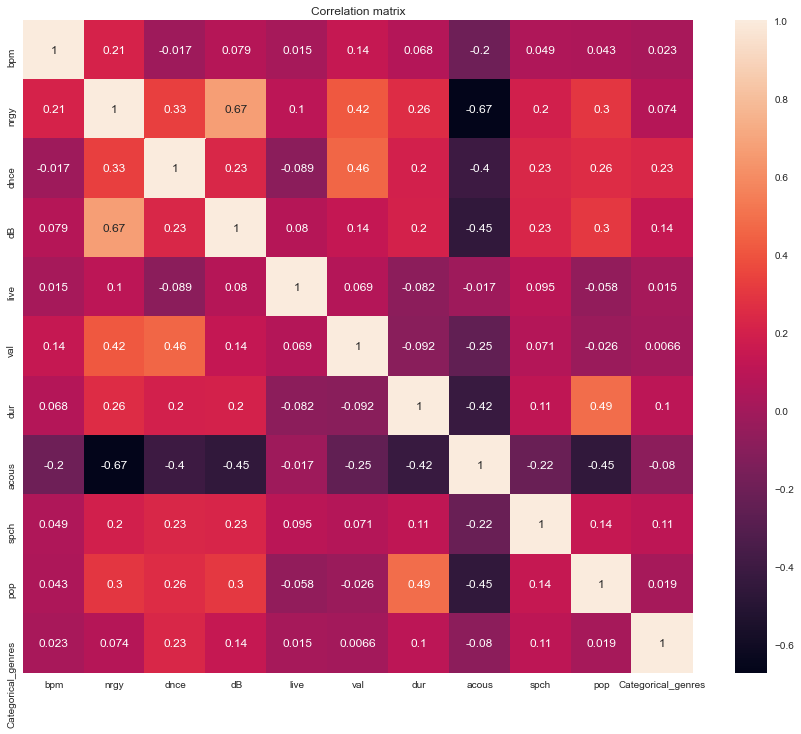

In [27]:
########################################
############## Pearson #################

corr = numerics.corr(method="pearson")

#now we plot a heatmap to visualise the results. 

plt.figure(figsize = (15, 12))
corr_map = sns.heatmap(corr, annot = True)
corr_map.set_title("Correlation matrix")

Text(0.5, 1.0, 'Correlation matrix')

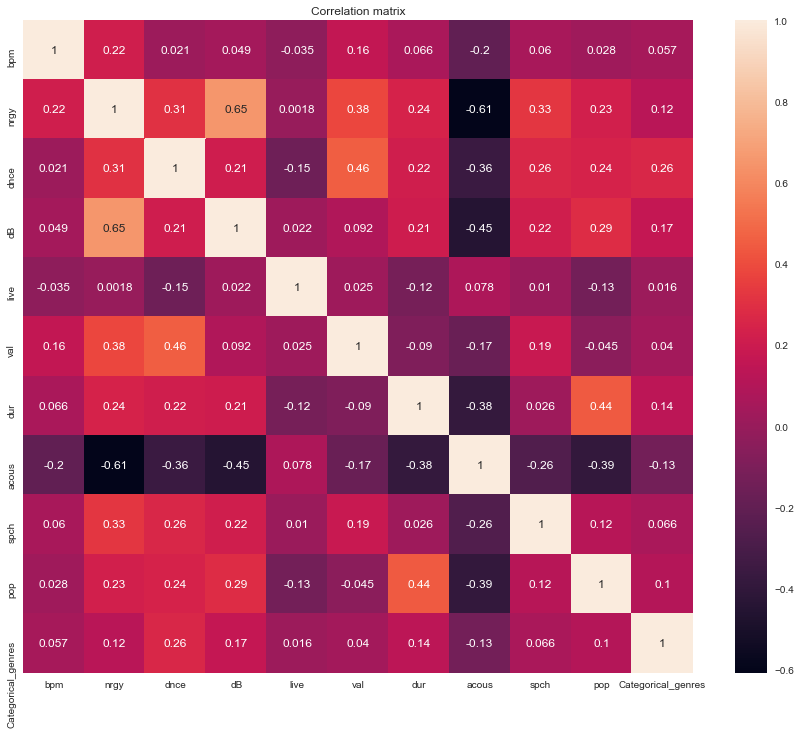

In [28]:
########################################
############## Spearman #################

corr = numerics.corr(method="spearman")

#now we plot a heatmap to visualise the results. 

plt.figure(figsize = (15, 12))
corr_map = sns.heatmap(corr, annot = True)
corr_map.set_title("Correlation matrix")

Text(0.5, 1.0, 'Correlation matrix')

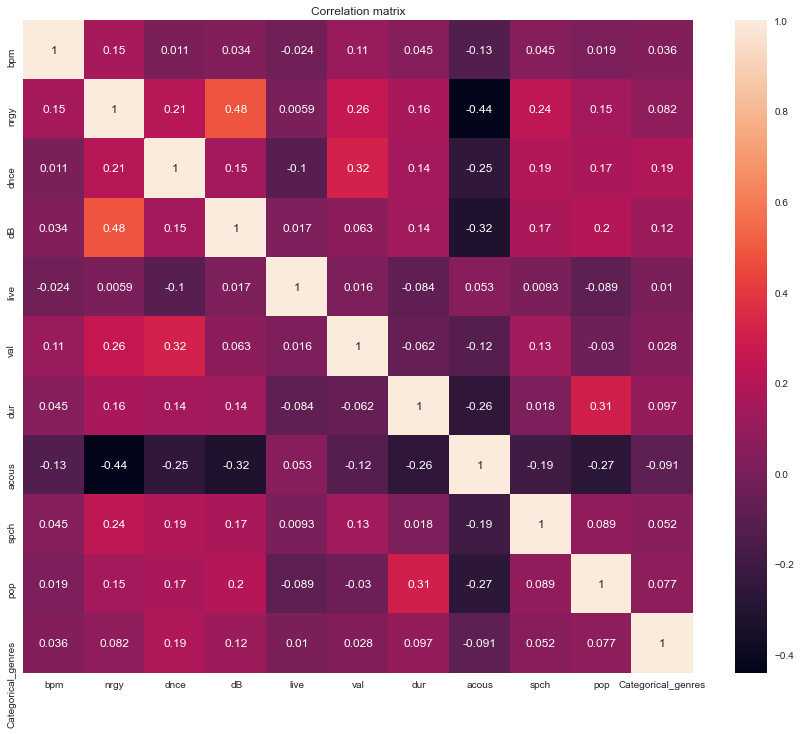

In [29]:
########################################
############## Kendall #################


corr = numerics.corr(method="kendall")

#now we plot a heatmap to visualise the results. 

plt.figure(figsize = (15, 12))
corr_map = sns.heatmap(corr, annot = True)
corr_map.set_title("Correlation matrix")

The variable with the highest, negative, correlation with popularity is acoustic.
The variable with the highest, positive, correlation with popularity is duration. 

[Text(0.5, 1.0, 'Relationship between Popularity and Duration')]

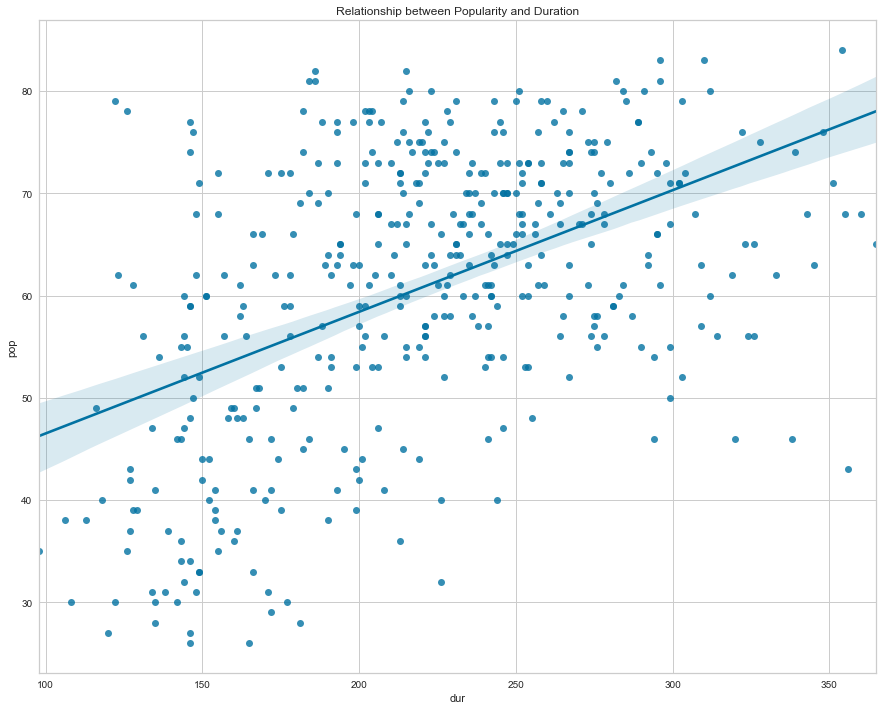

In [30]:
#Popularity and duration

plt.figure(figsize = (15,12))
sns.regplot(data = numerics, y = "pop", x = "dur").set(title = "Relationship between Popularity and Duration")

We observe a non-linear relationship between the popularity of a song and its duration:
as the duration of the song increases, its popularity increases, but then it starts to decrease. 

[Text(0.5, 1.0, 'Relationship between Popularity and Acousticness')]

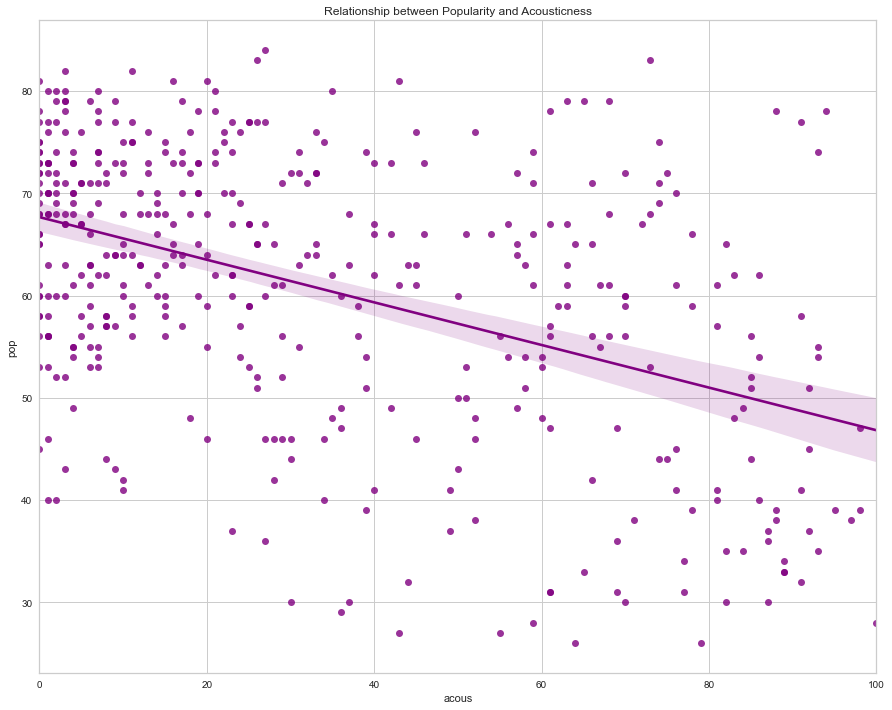

In [31]:
#Popularity and acousticness

plt.figure(figsize = (15,12))
sns.regplot(data = numerics, y = "pop", x = "acous", color = "purple").set(title = "Relationship between Popularity and Acousticness")

For the relationship between popularity and acousticness we observe a downward trend of the regression line.

[Text(0.5, 1.0, 'Relationship between Popularity and Danceability')]

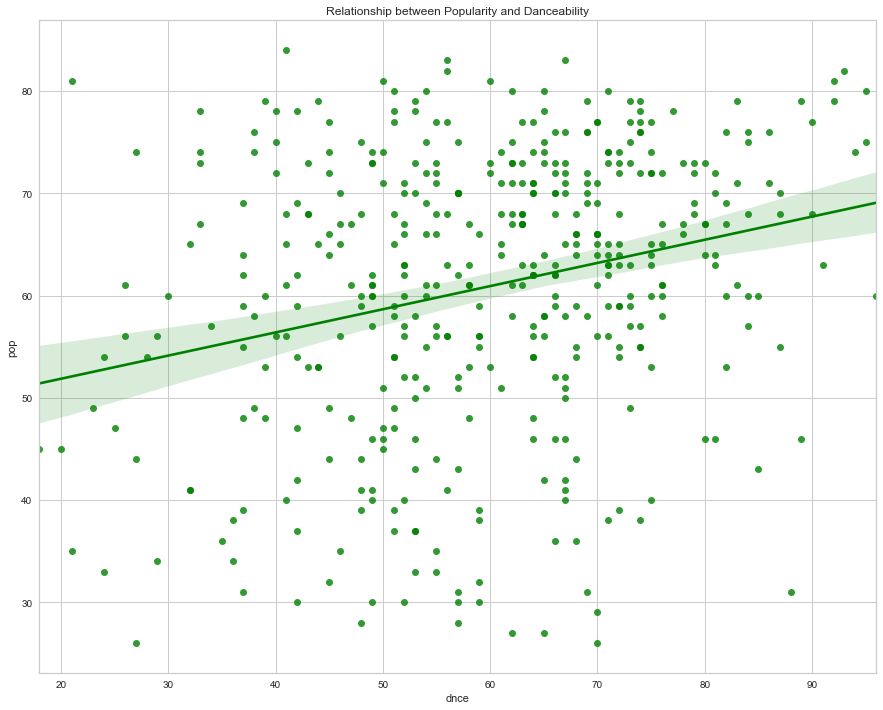

In [32]:
#Popularity and danceability

plt.figure(figsize = (15,12))
sns.regplot(data = numerics, y = "pop", x = "dnce", color = "green").set(title = "Relationship between Popularity and Danceability")

We observe high variance and a positive relationship between the two variables.

### Train Test Split

Since our dataset was already split into train and test,
we will simply separate the target variable from the independent variables.

In [33]:
y_train = df['pop'] #set popularity of the target variable
X_train = df.drop(["pop", "Id", "title", "artist", "top genre", 'year'], axis =1) #drop the target variable and the Id from the set of train features

In [34]:
#One hot encode the genres for the test dataset as well.
X_test = df_test
X_test['Categorical_genres'] = encoder.fit_transform(X_test['top genre'])

In [35]:
X_test = X_test.drop(["Id", "title", "artist", "top genre", 'year'], axis =1) #drop the target variable and the Id from the set of train features

In [36]:
#X_train
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train) #apply the scaler
X_train = pd.DataFrame(X_scaled, index = X_train.index, columns = X_train.columns)

#X_test

scaler.fit(X_test)
X_tscaled = scaler.transform(X_test)
X_test= pd.DataFrame(X_tscaled, index = X_test.index, columns = X_test.columns)

In [37]:
X_train.mean() #now closer to zero

bpm                   2.889622e-17
nrgy                  1.077271e-16
dnce                  1.165988e-16
dB                    2.287617e-16
live                 -1.660265e-17
val                   4.816036e-17
dur                  -8.719560e-17
acous                -2.534756e-19
spch                  3.041707e-18
Categorical_genres   -6.083414e-17
dtype: float64

In [38]:
X_train.var() #now closer to 1

bpm                   1.002288
nrgy                  1.002288
dnce                  1.002288
dB                    1.002288
live                  1.002288
val                   1.002288
dur                   1.002288
acous                 1.002288
spch                  1.002288
Categorical_genres    1.002288
dtype: float64

In [39]:
#y_train
#y_train = y_train.values.reshape(-1,1)
#scaler.fit(y_train)
##y_train = scaler.transform(y_train)

In [40]:
y_train = y_train.ravel()

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(438, 10)
(438,)
(114, 10)


## Feature Selection

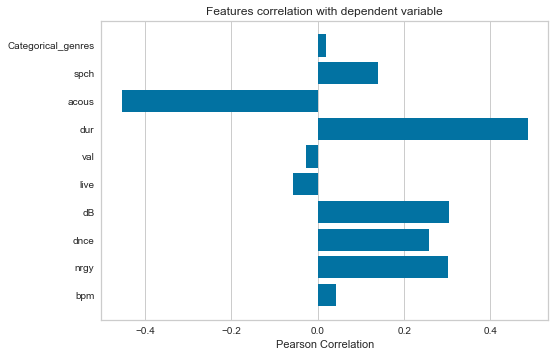

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [42]:
visualizer = FeatureCorrelation(labels=X_train.columns)
visualizer.fit(X_train, y_train)
visualizer.show()

In [43]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xa = X_train.copy()
Xa = selection.fit_transform(Xa)
Xa_new = pd.DataFrame(Xa, columns=X_train.columns)
Xa_new

bpm      nrgy      dnce        dB      live       val       dur  \
0   -0.458296 -1.330755 -0.967834  0.219319 -0.355246 -1.320589 -1.288360   
1   -0.179499 -0.739054 -0.445454  0.219319 -0.355246 -0.535425 -1.488576   
2   -0.537953 -1.103177  0.207521 -0.067432 -0.355246  0.291064  0.440784   
3    2.050877 -1.467301 -0.837239 -2.074688 -0.355246 -1.113967  0.204164   
4    0.099298 -0.602508 -0.249562  0.219319 -0.212168 -0.824696 -0.505695   
..        ...       ...       ...       ...       ...       ...       ...   
433 -1.533656 -1.740393 -2.730867 -2.361439 -0.569864 -1.816482 -0.123463   
434  1.174658  0.945017 -0.445454 -1.214436  0.360146  1.489472 -1.342964   
435  1.971220 -0.238384  0.860496  0.219319  0.145529  0.043117  1.241651   
436  1.851736  1.218109  0.272818  1.079571 -0.856021  1.158876 -0.542098   
437 -0.537953  0.580893  0.534008  0.219319 -0.283707  1.406823  1.096039   

        acous      spch  Categorical_genres  
0    1.448630 -0.472413           -1.179987  
1    0.561218 -0.472413            1.957334  
2   -0.735770 -0.472413           -1.179987  
3   -0.257933 -0.472413           -1.179987  
4    0.424693 -0.472413            1.251436  
..        ...       ...                 ...  
433  2.028862 -0.293264           -1.179987  
434  0.595349 -0.472413           -0.434873  
435 -0.326195  1.498224            0.584756  
436 -0.940558  0.423331           -0.474090  
437 -0.735770 -0.651562           -1.101554  

[438 rows x 10 columns]

#### Feature Selection from coefficients

To get a sense of the importance of the features, we are now going to use the RidgeCV estimator.
The features with the highest absolute coefficient are  considered the most important. 


In [44]:
Xb = X_train.copy()
yb = y_train.copy()
ridge = RidgeCV(alphas=np.logspace(-6, 6)).fit(Xb, yb)
importance = np.abs(ridge.coef_)

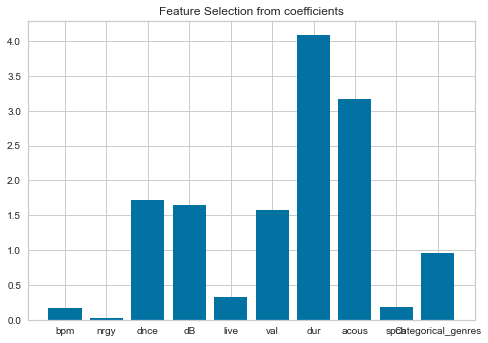

In [45]:
plt.bar(height=importance, x = Xb.columns)
plt.title("Feature Selection from coefficients")
plt.show()

#### Sequential Feature Selection

In [46]:
#forward
seqf = SequentialFeatureSelector(ridge, n_features_to_select=4, direction="forward").fit(Xb, yb)

In [47]:
#backward
seqb = SequentialFeatureSelector(ridge, n_features_to_select=4, direction="backward").fit(Xb, yb)

In [48]:
names = Xb.columns
print(names)
print("Selected by f:")
print(seqf.get_support())
print("Selected by b:")
print(seqb.get_support())

Index(['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch',
       'Categorical_genres'],
      dtype='object')
Selected by f:
[False False False  True False  True  True  True False False]
Selected by b:
[False False  True False False  True  True  True False False]


Forward selection has selected: dB, val, dur, and acous.
Backward selection has selected: nrgy, val, dur, and acous. 

However, as seen above when looking at the correlation among features,
it seems to us that dropping any of the variables in our dataset
might result in the loss of significant explanatory power. 

# Cross Validation and Model Selection

## Linear Regression

We start by using the linear regression model. 

In [49]:
#Training with all numerical variables
lin_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
cross_Val = np.mean(cross_val_score(lin_reg, X_train, y_train, cv=5))
print("The cross validation score for the linear regression is: " + str(cross_Val))

The cross validation score for the linear regression is: 0.270823278624004


In [50]:
print('The coefficients of the regression are: ' + str(lin_reg.coef_))

The coefficients of the regression are: [-0.17105586 -0.50351117  1.88443007  1.90704737 -0.28566873 -1.6985039
  4.35152906 -3.52999325  0.10818533 -1.12515335]


In [51]:
y_train_pred = lin_reg.predict(X_train)

The mean squared error is:

In [52]:
mse = mean_squared_error(y_train, y_train_pred)
print('MSE :' + str(mse)) #very high

MSE :118.00501772173381


## Ridge Regression

Now we opt for a Ridge Regression, an alternative to the classical linear regression in which the coefficients are estimated not by ols but by the ridge estimator. This might be helpful in a context like ours where the independent variables are highly correlated.

In [53]:
reg = linear_model.RidgeCV(alphas=np.logspace(-1, 1, 100))
reg = reg.fit(X_train, y_train)
reg_score = reg.score(X_train, y_train)
print("The score for the Ridge regression is: " + str(reg_score))

The score for the Ridge regression is: 0.3476724940361203


In [54]:
y_true = y_train

In [55]:
y_train_pred_ridge = reg.predict(X_train)

In [56]:
mse = mean_squared_error(y_train, y_train_pred_ridge)
print('MSE :' + str(mse)) #very high

MSE :118.02931885477136


## Polynomial regression

In [58]:
for degree in range(1, 2):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    reg2 = LinearRegression()
    reg2 = reg2.fit(X_poly, y_train)
    cross_Val = np.mean(cross_val_score(reg2, X_poly, y_train, cv=5))

print("The cross validation score for the polynomial regression is: " +str(cross_Val))

The cross validation score for the polynomial regression is: 0.270823278624004


In [59]:
y_pred_train_poly = reg2.predict(X_poly)

## Support Vector Regression

In [61]:
svr = SVR(kernel='rbf')
svr_reg_lin = svr.fit(X_train, y_train)
cross_Val = np.mean(cross_val_score(svr_reg_lin, X_train, y_train, cv=5))
print("The cross validation score for the SVR is: " + str(cross_Val))

The cross validation score for the SVR is: 0.23338157191680248


In [62]:
y_pred_train_svr = svr_reg_lin.predict(X_train)

In [63]:
mse = mean_squared_error(y_train, y_pred_train_svr)
print('MSE :' + str(mse))

MSE :122.29425722116667


## Random Forest Regression

In [64]:
rndm = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, n_estimators = 300, random_state = 0)
rndm_reg = rndm.fit(X_train, y_train)
cross_Val = np.mean(cross_val_score(rndm, X_train, y_train, cv=5))
print("The cross validation score for the RF regression is: " + str(cross_Val))

The cross validation score for the RF regression is: 0.2881967099897287


In [ ]:
#TUNING
model = RandomForestRegressor()
parameters = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [2,3,6],
   'criterion' :['mse', 'mae']
}
GSCV_rndm = GridSearchCV(estimator=model, param_grid= parameters, cv=5)
GSCV_rf = GSCV_rndm.fit(X_train, y_train)
print(GSCV_rf.best_params_ )

#{'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}

In [65]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth=6, max_features='sqrt', criterion='mse')
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features='sqrt')

In [66]:
y_pred_random_train = random_forest.predict(X_train)

In [67]:
y_pred_rf = random_forest.predict(X_test) #use for Kaggle

In [ ]:
mse = mean_squared_error(y_train, y_pred_random_train)
print('MSE :' + str(mse))

## Gradient boosting regression (lowest MSE)

In [ ]:
grad = GradientBoostingRegressor()
gbr = grad.fit(X_train, y_train)
cross_Val = np.mean(cross_val_score(grad, X_train, y_train, cv=5))
print("The cross validation score for the GB regression is: " + str(cross_Val))

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6,8]
                 }
GSCV_grad =  GridSearchCV(estimator= GradientBoostingRegressor(), param_grid= parameters, cv=5)
GSCV_grad.fit(X_train, y_train)
GSCV_grad.best_params_ 

In [ ]:
grad = GradientBoostingRegressor(learning_rate=0.02, max_depth = 4, n_estimators = 100, subsample=0.5)
gb = grad.fit(X_train, y_train)

In [ ]:
y_pred_GB = grad.predict(X_test)

In [ ]:
y_pred_train_gb = grad.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train_gb)
print('MSE :' + str(mse)) #very high

In [68]:
y_pred_rf

array([67.71440745, 67.50816182, 57.2739097 , 64.2497186 , 54.86549178,
       66.47328043, 56.84485478, 45.58669581, 69.25995018, 65.95375186,
       57.75594327, 66.96452373, 53.62238128, 63.41311914, 67.02247199,
       64.8750928 , 59.02072891, 63.53509546, 65.86330244, 64.77109032,
       51.4375376 , 55.26344115, 53.95157667, 48.64643474, 56.59668966,
       65.28576033, 64.15628323, 55.70822311, 50.31656542, 71.27185065,
       67.36554671, 50.80628172, 68.56586329, 66.39728965, 66.79848876,
       69.79056683, 63.16647141, 54.57355235, 64.74921923, 67.8660745 ,
       64.30788438, 63.93646288, 65.55604498, 48.34592634, 64.92132092,
       63.12493951, 65.24636882, 64.12032373, 59.53414874, 64.5675694 ,
       49.8673609 , 67.37372164, 61.68060127, 49.50564884, 65.03969205,
       58.08399446, 67.02727464, 54.14625578, 68.5843638 , 48.06862065,
       64.09089807, 65.397887  , 63.14332523, 66.08858692, 67.45339226,
       62.96411437, 63.26752221, 57.79456012, 63.69788746, 61.74

In [69]:
y_pred_rf = pd.DataFrame(y_pred_rf, columns = ['pop'])
y_pred_rf['Id'] = df_test['Id']

In [70]:
y_pred_rf.to_csv('Group4_Regression_predictions_finalestfinal.csv') 